In [26]:
!pip install pillow

In [27]:
!pip install requests

In [28]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

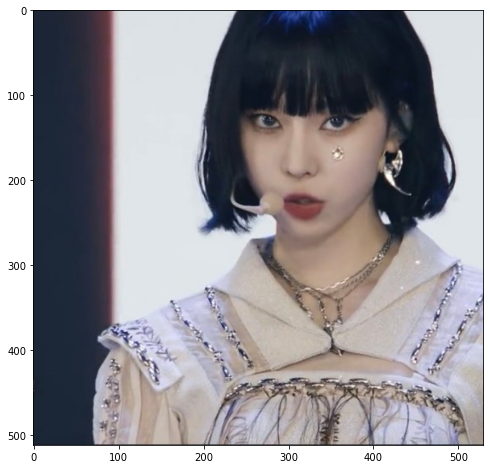

In [119]:
img = mpimg.imread("./day2/tear.jfif")

plt.figure(figsize=(10,8))
plt.imshow(img)
plt.show()

In [113]:
import requests

In [120]:
client_id = "f4AKRVTREX8a4U6Jyic8"
client_secret = "42DKFZZ2E6"

url = "https://openapi.naver.com/v1/vision/celebrity"
files = {'image':open('./day2/tear.jfif','rb')}

headers = {'X-Naver-Client-Id': client_id, 'X-Naver-Client-Secret':client_secret}

response = requests.post(url, files=files, headers=headers)

In [121]:
import json

In [122]:
parsed = json.loads(response.text)
print(json.dumps(parsed, indent=4, sort_keys=False, ensure_ascii=False))

{
    "info": {
        "size": {
            "width": 530,
            "height": 512
        },
        "faceCount": 1
    },
    "faces": [
        {
            "celebrity": {
                "value": "이민혁",
                "confidence": 0.01
            }
        }
    ]
}


In [123]:
url = "https://openapi.naver.com/v1/vision/face"
files = {'image':open('./day2/tear.jfif','rb')}

headers = {'X-Naver-Client-Id': client_id, 'X-Naver-Client-Secret':client_secret}

response = requests.post(url, files=files, headers=headers)
parsed = json.loads(response.text)
print(json.dumps(parsed, indent=4, sort_keys=False, ensure_ascii=False))

{
    "info": {
        "size": {
            "width": 530,
            "height": 512
        },
        "faceCount": 1
    },
    "faces": [
        {
            "roi": {
                "x": 253,
                "y": 99,
                "width": 153,
                "height": 153
            },
            "landmark": {
                "leftEye": {
                    "x": 286,
                    "y": 128
                },
                "rightEye": {
                    "x": 353,
                    "y": 128
                },
                "nose": {
                    "x": 309,
                    "y": 185
                },
                "leftMouth": {
                    "x": 293,
                    "y": 222
                },
                "rightMouth": {
                    "x": 342,
                    "y": 226
                }
            },
            "gender": {
                "value": "female",
                "confidence": 0.999006
            },
          

In [124]:
detect_result = parsed

In [125]:
detect_result.keys()

dict_keys(['info', 'faces'])

In [126]:
detect_result['faces']

[{'roi': {'x': 253, 'y': 99, 'width': 153, 'height': 153},
  'landmark': {'leftEye': {'x': 286, 'y': 128},
   'rightEye': {'x': 353, 'y': 128},
   'nose': {'x': 309, 'y': 185},
   'leftMouth': {'x': 293, 'y': 222},
   'rightMouth': {'x': 342, 'y': 226}},
  'gender': {'value': 'female', 'confidence': 0.999006},
  'age': {'value': '16~20', 'confidence': 0.508082},
  'emotion': {'value': 'talking', 'confidence': 0.935527},
  'pose': {'value': 'frontal_face', 'confidence': 0.999831}}]

In [127]:
detect_result['faces'][0]

{'roi': {'x': 253, 'y': 99, 'width': 153, 'height': 153},
 'landmark': {'leftEye': {'x': 286, 'y': 128},
  'rightEye': {'x': 353, 'y': 128},
  'nose': {'x': 309, 'y': 185},
  'leftMouth': {'x': 293, 'y': 222},
  'rightMouth': {'x': 342, 'y': 226}},
 'gender': {'value': 'female', 'confidence': 0.999006},
 'age': {'value': '16~20', 'confidence': 0.508082},
 'emotion': {'value': 'talking', 'confidence': 0.935527},
 'pose': {'value': 'frontal_face', 'confidence': 0.999831}}

In [128]:
detect_result['faces'][0]['roi']

{'x': 253, 'y': 99, 'width': 153, 'height': 153}

In [129]:
detect_result['faces'][0]['gender']

{'value': 'female', 'confidence': 0.999006}

In [130]:
detect_result['faces'][0]['age']

{'value': '16~20', 'confidence': 0.508082}

In [131]:
detect_result['faces'][0]['emotion']

{'value': 'talking', 'confidence': 0.935527}

In [132]:
x, y, w, h = detect_result['faces'][0]['roi'].values()
gender, confidence = detect_result['faces'][0]['gender'].values()
emotion, emotion_confidence = detect_result['faces'][0]['emotion'].values()
age, age_confidence = detect_result['faces'][0]['age'].values()

In [133]:
annotation = gender+':'+str(confidence)+'\n'+emotion+':'+str(emotion_confidence)

In [134]:
import matplotlib.patches as patches

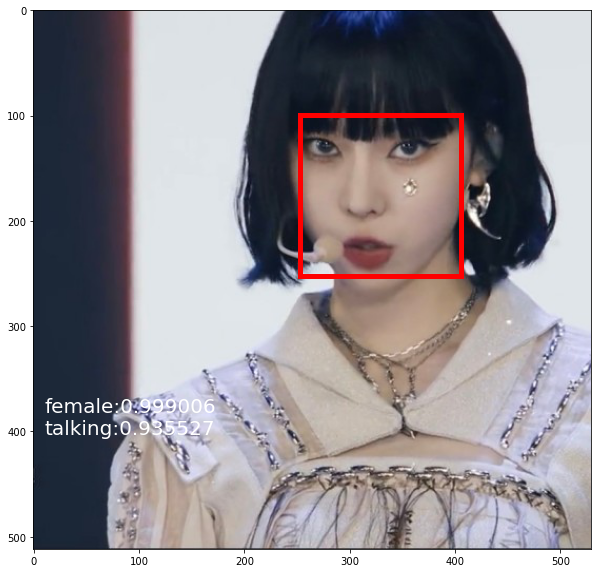

In [135]:
img = mpimg.imread('./day2/tear.jfif')

fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(img)

rect_face = patches.Rectangle((x,y),w,h, linewidth=5, edgecolor='r', facecolor='none')
ax.add_patch(rect_face)

plt.text(10,400, annotation, wrap=True, fontsize=20, color='white')
plt.show()

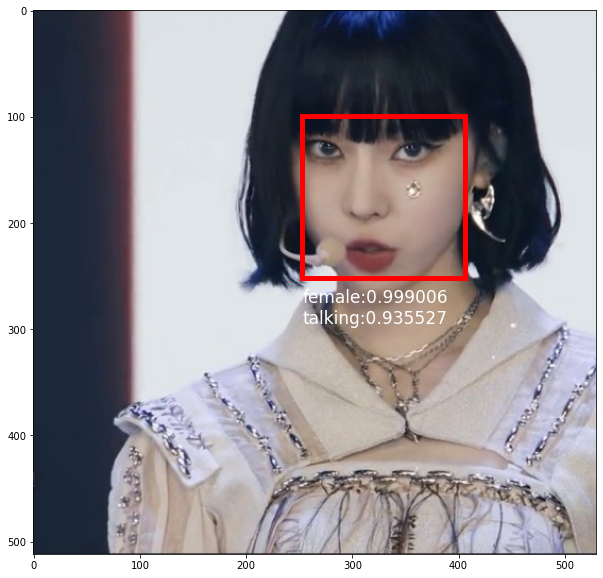

In [136]:
img = mpimg.imread('./day2/tear.jfif')

fig, ax = plt.subplots(figsize=(14,10))
ax.imshow(img)


for each in detect_result['faces']:
    
    x, y, w, h = each['roi'].values()
    gender, confidence = each['gender'].values()
    emotion, emotion_confidence = each['emotion'].values()

    rect_face = patches.Rectangle((x,y),w,h, linewidth=5, edgecolor='r', facecolor='none')
    annotation = gender+':'+str(confidence)+'\n'+emotion+':'+str(emotion_confidence)
    plt.text(x,y+h+40, annotation, wrap=True, fontsize=17, color='white')
    ax.add_patch(rect_face)

    
plt.show()